In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scipy import stats
from matplotlib.pyplot import xscale, ylim
import random
import dataframe_image as dfi
import random
import seaborn as sns
from matplotlib.pyplot import figure

#token
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Question 1

In [376]:
#a
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
test = pd.read_csv('spamtest.csv', encoding = "ISO-8859-1")
test

,ï»¿class,subscriber,message_body,timestamp,type
0,0.0,1,Hey sir I have a question on software I am doi...,4/4/11 14:40,Incoming
1,0.0,1,s the same guys name as the first but it will ...,4/4/11 14:40,Incoming
2,0.0,1,thing that I have to do to allow me to do it,4/4/11 14:40,Incoming
3,0.0,1,"The identity field must be unique, but you can...",4/4/11 14:41,Outgoing
4,0.0,1,Ok thank u sir,4/4/11 14:42,Incoming
...,...,...,...,...,...
4947,NaN,NaN,NaN,NaN,NaN
4948,NaN,NaN,NaN,NaN,NaN
4949,NaN,NaN,NaN,NaN,NaN
4950,NaN,NaN,NaN,NaN,NaN


In [377]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [378]:
df['sms'] = df['v2']
df['spam'] = np.where(df['v1']== 'spam',1,0)



In [379]:
df = df[['sms','spam']]
spam = df.loc[df['spam']== 1]
ham = df.loc[df['spam']==0]

### 2ndd approach to question 1

In [380]:
def combine_strings(df,column_name):
    combined_string =' '.join(df[column_name])
    return combined_string

In [381]:
spam_text = combine_strings(spam,'sms')
ham_text = combine_strings(ham,'sms')

In [382]:
tok1 = nltk.word_tokenize(ham_text)
tok2 = nltk.word_tokenize(spam_text)

In [383]:
d1 = nltk.FreqDist(tok1)
d2 = nltk.FreqDist(tok2)

In [384]:
d1.N(),d2.N()

(83325, 20834)

In [385]:
len(d1.keys()), len(d2.keys())

(8998, 3714)

In [386]:
teststring = "Hey, what's up rich?"
teststring2 = "Do you want free airtime?"

In [387]:
print("Word\tham_occ\tham_tot\tspam_occ\tspam_tot")

for token in nltk.word_tokenize(teststring):
    print(token, '\t', end="" )
    print(d1[token] , '\t',  d1.N(),'\t', d2[token], 
          '\t', d2.N())

Word	ham_occ	ham_tot	spam_occ	spam_tot
Hey 	89 	 83325 	 5 	 20834
, 	1500 	 83325 	 371 	 20834
what 	145 	 83325 	 13 	 20834
's 	421 	 83325 	 68 	 20834
up 	261 	 83325 	 19 	 20834
rich 	3 	 83325 	 0 	 20834
? 	1367 	 83325 	 174 	 20834


In [388]:
DEBUG=0
def score(utterance):
    cumscore = 0
    NHAM = d1.N()
    NSPAM = d2.N()
    MAXSCORE = np.log(20) / np.log(2)
    for token in nltk.word_tokenize(utterance):
        partialscore=0  # Catchall if a word has too few instances
        if d1[token] != 0 and d2[token] != 0 and (d1[token]+d2[token]) >= 5:
            partialscore = (np.log(d1[token]) - np.log(NHAM) -
                            np.log(d2[token])  + np.log(NSPAM))/np.log(2) 
            partialscore = np.minimum(MAXSCORE, np.maximum(-MAXSCORE, partialscore))
            if DEBUG: 
                print(partialscore, d1[token], d2[token])
        if d1[token] == 0 and d2[token] >= 5 :
            partialscore = -MAXSCORE
        if d2[token] == 0 and d1[token] >= 5 :
            partialscore = MAXSCORE
#        if d2[token] + d1[token] <5:
#            print("NOTENOUGH:", token ,d1[token],d2[token])
        cumscore = cumscore + partialscore
    return(cumscore)

In [389]:

test = test[test['message_body'].apply(lambda x: isinstance(x, str))]
test

,ï»¿class,subscriber,message_body,timestamp,type
0,0.0,1,Hey sir I have a question on software I am doi...,4/4/11 14:40,Incoming
1,0.0,1,s the same guys name as the first but it will ...,4/4/11 14:40,Incoming
2,0.0,1,thing that I have to do to allow me to do it,4/4/11 14:40,Incoming
3,0.0,1,"The identity field must be unique, but you can...",4/4/11 14:41,Outgoing
4,0.0,1,Ok thank u sir,4/4/11 14:42,Incoming
...,...,...,...,...,...
4929,0.0,156,of course,4/3/12 15:51,Outgoing
4930,0.0,148,I heard,4/3/12 19:03,Incoming
4931,0.0,154,Oh well,4/3/12 19:03,Incoming
4932,0.0,156,cu in 20,4/3/12 19:03,Outgoing


In [390]:
df

,sms,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [391]:

def apply_func_to_col(df, col_name, func):
    df['score'] = df[col_name].apply(func)
    return df


spam_scorred = apply_func_to_col(test,'message_body',score)
og_scorred = apply_func_to_col(df,'sms',score)



C:\Users\charl\AppData\Local\Temp/ipykernel_20512/1137464500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df[col_name].apply(func)


(array([2.100e+01, 3.900e+01, 8.700e+01, 8.900e+01, 1.320e+02, 1.220e+02,
        9.200e+01, 8.500e+01, 1.880e+02, 9.970e+02, 1.438e+03, 8.350e+02,
        5.390e+02, 3.350e+02, 2.230e+02, 1.530e+02, 7.900e+01, 3.500e+01,
        2.600e+01, 1.500e+01, 6.000e+00, 1.100e+01, 2.000e+00, 5.000e+00,
        5.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-90.74225048, -80.48188889, -70.2215273 , -59.96116571,
        -49.70080412, -39.44044253, -29.18008095, -18.91971936,
         -8.65935777,   1.60100382,  11.86136541,  22.121727  ,
         32.38208859,  42.64245018,  52.90281177,  63.16317336,
         73.42353495,  83.68389654,  93.94425812, 104.20461971,
        114.4649813 , 124.72534289, 134.98570448, 145.24

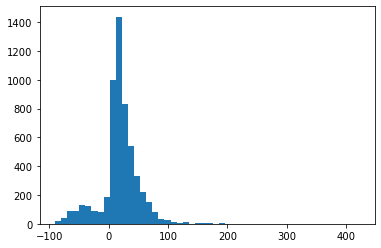

In [394]:
plt.hist(og_scorred.score,bins = 50)
#plt.hist(spam_scorred.score,bins = 50)

In [395]:
og_scorred

,sms,spam,score
0,"Go until jurong point, crazy.. Available only ...",0,47.202432
1,Ok lar... Joking wif u oni...,0,23.328317
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,-64.649157
3,U dun say so early hor... U c already then say...,0,34.546863
4,"Nah I don't think he goes to usf, he lives aro...",0,42.646784
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,-48.007972
5568,Will Ì_ b going to esplanade fr home?,0,20.420739
5569,"Pity, * was in mood for that. So...any other s...",0,20.022413
5570,The guy did some bitching but I acted like i'd...,0,50.769901


C:\Users\charl\AppData\Local\Temp/ipykernel_20512/3263917142.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("SPAMSPAMSPAMSPAM.png", dpi=300, bbbox_inches="tight")


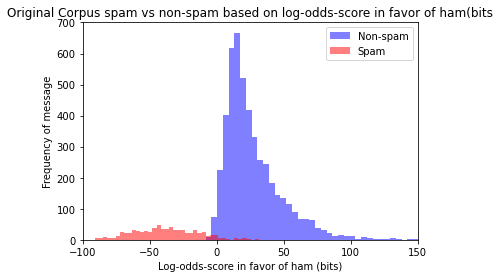

In [399]:
plt.hist(og_scorred[og_scorred['spam']==0].score, bins=100, color="blue", alpha=0.5, label="Non-spam")
plt.hist(og_scorred[og_scorred['spam']==1].score, bins=40, color="red", alpha=0.5, label="Spam")
plt.xlabel("Log-odds-score in favor of ham (bits)")
plt.ylabel('Frequency of message')
plt.xlim(-100, 150)
plt.title('Original Corpus spam vs non-spam based on log-odds-score in favor of ham(bits')
plt.legend()
plt.savefig("SPAMSPAMSPAMSPAM.png", dpi=300, bbbox_inches="tight")

In [400]:
spam_scorred

,ï»¿class,subscriber,message_body,timestamp,type,score
0,0.0,1,Hey sir I have a question on software I am doi...,4/4/11 14:40,Incoming,32.755084
1,0.0,1,s the same guys name as the first but it will ...,4/4/11 14:40,Incoming,42.691638
2,0.0,1,thing that I have to do to allow me to do it,4/4/11 14:40,Incoming,16.813987
3,0.0,1,"The identity field must be unique, but you can...",4/4/11 14:41,Outgoing,12.571772
4,0.0,1,Ok thank u sir,4/4/11 14:42,Incoming,14.684461
...,...,...,...,...,...,...
4929,0.0,156,of course,4/3/12 15:51,Outgoing,4.760240
4930,0.0,148,I heard,4/3/12 19:03,Incoming,3.095401
4931,0.0,154,Oh well,4/3/12 19:03,Incoming,8.292703
4932,0.0,156,cu in 20,4/3/12 19:03,Outgoing,-0.098397


C:\Users\charl\AppData\Local\Temp/ipykernel_20512/1273362655.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("SPAMSPAMSPAMSPAM.png", dpi=300, bbbox_inches="tight")


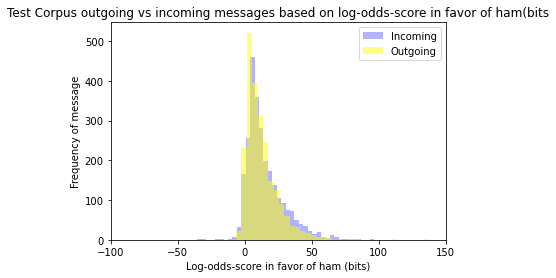

In [410]:
plt.hist(spam_scorred[spam_scorred['type']=='Incoming'].score, bins=40, color="blue", alpha=0.3, label="Incoming")
plt.hist(spam_scorred[spam_scorred['type']=='Outgoing'].score, bins=40, color="yellow", alpha=0.5, label="Outgoing")
plt.xlabel("Log-odds-score in favor of ham (bits)")
plt.ylabel('Frequency of message')
plt.xlim(-100, 150)
plt.title('Test Corpus outgoing vs incoming messages based on log-odds-score in favor of ham(bits')
plt.legend()
plt.savefig("SPAMSPAMSPAMSPAM.png", dpi=300, bbbox_inches="tight")

### 3rd approach to question 1

In [279]:
import nltk
import string
import pandas as pd
from collections import Counter

def token_ratios_nltk(string):
    tokens = nltk.word_tokenize(string)
    tokens = [token for token in tokens if token.isalnum()]
    token_counts = Counter(tokens)
    total_tokens = len(tokens)
    ratios = []
    for word, count in token_counts.items():
        ratios.append((word, count / total_tokens))
    df = pd.DataFrame(ratios, columns=['word', 'ratio'])
    return df, total_tokens

token_ratios_nltk(ham_text)

(             word     ratio
 0              Go  0.000148
 1           until  0.000311
 2          jurong  0.000015
 3           point  0.000178
 4           crazy  0.000133
 ...           ...       ...
 8202         Sony  0.000015
 8203     salesman  0.000015
 8204         Pity  0.000015
 8205  suggestions  0.000015
 8206     bitching  0.000015
 
 [8207 rows x 2 columns],
 67471)

In [276]:
spam_token = token_ratios_nltk(spam_text)
ham_token  = token_ratios_nltk(ham_text)


In [201]:
merged = pd.merge(spam_token, ham_token, on='word', how='outer')
merged.ratio_x.fillna(0.000001, inplace=True)
merged.ratio_y.fillna(0.000001, inplace=True)
merged['spam_ratio'] = merged.ratio_x/merged.ratio_y
merged.rename(columns={'word': 'word', 'spam_ratio': 'ratio'}, inplace=True)
merged.drop(columns=['ratio_x', 'ratio_y'], inplace=True)
merged


,word,ratio
0,Free,42.282632
1,entry,1492.091913
2,in,0.359357
3,2,2.293649
4,a,1.484692
...,...,...
10234,BORING,0.067471
10235,salesman,0.067471
10236,Pity,0.067471
10237,suggestions,0.067471


In [94]:
### applying to test data
test = test['message_body']
test = pd.DataFrame(test)
test = test.dropna()
test

,message_body
0,Hey sir I have a question on software I am doi...
1,s the same guys name as the first but it will ...
2,thing that I have to do to allow me to do it
3,"The identity field must be unique, but you can..."
4,Ok thank u sir
...,...
4929,of course
4930,I heard
4931,Oh well
4932,cu in 20


In [86]:
# Load the test dataframe
test_df = test

# Define the threshold value for classifying as spam
threshold = 0.8

# Tokenize the test messages
vectorizer = CountVectorizer()
X_test = vectorizer.fit_transform(test_df["message_body"])

# Create a list to store the predictions
predictions = []
spam_scores = []

# Iterate over each message in the test dataframe
for i in range(len(test_df)):
    message = test_df.iloc[i]["message_body"]
    message_tokens = message.split()
    spam_score = 0

    # Iterate over each token in the message
    for token in message_tokens:
        # Look up the token in the merged dataframe
        if token in merged['word'].values:
            token_ratio = merged.loc[merged['word'] == token]['ratio'].values[0]
            spam_score += token_ratio
    # average the score and append it to the list
    spam_scores.append(spam_score/len(message_tokens))
    # Append the prediction to the list
    if spam_score/len(message_tokens) > threshold:
        predictions.append("spam")
    else:
        predictions.append("not spam")

# Add the predictions and spam scores to the test dataframe
test_df["prediction"] = predictions
test_df["spam_score"] = spam_scores


In [95]:
test_df

,message_body,prediction,spam_score
0,Hey sir I have a question on software I am doi...,not spam,0.630412
1,s the same guys name as the first but it will ...,not spam,0.618744
2,thing that I have to do to allow me to do it,spam,0.945453
3,"The identity field must be unique, but you can...",not spam,0.325629
4,Ok thank u sir,not spam,0.076507
...,...,...,...
4929,of course,not spam,0.371555
4930,I heard,not spam,0.715335
4931,Oh well,not spam,0.057000
4932,cu in 20,spam,1.126515


#### Attempt 3

In [92]:
import pandas as pd
from collections import Counter

# Read in the dataset
data = df

# Create a Counter object for spam and ham messages
spam_counter = Counter()
ham_counter = Counter()

# Iterate through the dataset and count the words in each message
for index, row in data.iterrows():
    if row['v1'] == 'spam':
        for word in row['v2'].split():
            spam_counter[word] += 1
    else:
        for word in row['v2'].split():
            ham_counter[word] += 1

# Print the most common words in the spam messages
print('Most common words in spam messages:')
print(spam_counter.most_common(10))

# Print the most common words in the ham messages
print('Most common words in ham messages:')
print(ham_counter.most_common(10))


Most common words in spam messages:
[('to', 604), ('a', 358), ('your', 187), ('call', 185), ('or', 185), ('the', 178), ('2', 169), ('for', 169), ('you', 164), ('is', 143)]
Most common words in ham messages:
[('to', 1530), ('you', 1458), ('I', 1436), ('the', 1019), ('a', 969), ('and', 738), ('i', 736), ('in', 734), ('u', 645), ('is', 638)]


In [99]:
import math

def score_message(message, spam_counter, ham_counter):
    # Split the message into words
    words = message.split()
    # Initialize the scores
    spam_score = 0
    ham_score = 0
    # Iterate through the words in the message
    for word in words:
        # Check if the word has been seen before in the training data
        if word in spam_counter and word in ham_counter:
            # Calculate the probability that the word belongs to the spam group
            p_word_given_spam = spam_counter[word] / sum(spam_counter.values())
            # Calculate the probability that the word belongs to the ham group
            p_word_given_ham = ham_counter[word] / sum(ham_counter.values())
            # Update the scores
            spam_score += math.log(p_word_given_spam / (1 - p_word_given_spam))
            ham_score += math.log(p_word_given_ham / (1 - p_word_given_ham))
    # Return the scores as a tuple
    return (spam_score, ham_score)

# Test the function

import pandas as pd

# Read the test dataframe

# Add new columns to store the spam and ham scores
test['spam_score'] = 0
test['ham_score'] = 0

# Define the function to be applied to each row
def score_row(row):
    row['spam_score'], row['ham_score'] = score_message(row['message_body'], spam_counter, ham_counter)
    return row

# Apply the function to each row of the test dataframe
test = test.apply(score_row, axis=1)

# Print the first 10 rows of the test dataframe
test

,message_body,spam_score,ham_score
0,Hey sir I have a question on software I am doi...,-149.749209,-134.894791
1,s the same guys name as the first but it will ...,-159.424430,-142.898711
2,thing that I have to do to allow me to do it,-76.092842,-65.519814
3,"The identity field must be unique, but you can...",-48.788129,-43.068135
4,Ok thank u sir,-5.935119,-4.656143
...,...,...,...
4929,of course,-5.250075,-4.916957
4930,I heard,-15.074153,-12.899348
4931,Oh well,-19.575704,-14.536342
4932,cu in 20,-14.314554,-14.561768


In [98]:
import matplotlib.pyplot as plt

# Plot the histogram of log-odds-scores for all the messages in the training set 
plt.hist(test[test['label'] == 'spam']['spam_score'], bins=50, color='r', alpha=0.5, label='Spam')
plt.hist(test[test['label'] == 'ham']['ham_score'], bins=50, color='g', alpha=0.5, label='Ham')
plt.legend()
plt.xlabel('Log-Odds Score')
plt.ylabel('Frequency')
plt.show()


KeyError: 'label'

#### Question 2

In [119]:
test = pd.read_csv("penguins_test.csv")
train = pd.read_csv("penguins_train.csv")
train

train.dropna(inplace=True)


In [120]:
# ONE-HOT ENCODING

train["SP1"] = train.Species == "Adelie"
train["SP2"] = train.Species == "Gentoo"
train["SP3"] = train.Species == "Chinstrap"


In [121]:
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

Text(0, 0.5, 'Body mass (g)')

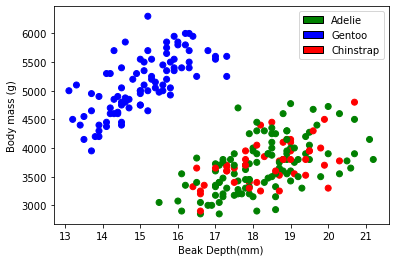

In [122]:
plt.scatter(train["Beak Depth (mm)"], train["Body Mass (g)"] , color = train.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)
plt.xlabel("Beak Depth(mm)"); plt.ylabel("Body mass (g)")

In [123]:
penguinclean = train[np.isfinite( train["Beak Depth (mm)"]) & 
                        np.isfinite( train["Body Mass (g)"]) &
                        np.isfinite( train["Flipper Length (mm)"]) & 
                        np.isfinite( train["Beak Length (mm)"])]

In [124]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(penguinclean[["Beak Depth (mm)", "Body Mass (g)"]].values, penguinclean.SP2.values)

In [125]:
reg.coef_,reg.intercept_

(array([-0.13841282,  0.00032788]), 1.3478033373913645)

In [126]:
X = penguinclean[["Beak Depth (mm)", "Body Mass (g)"]].values
Y = penguinclean.SP2
YHAT = np.dot(X, reg.coef_ ) + reg.intercept_

In [127]:
x0div = np.arange(14,24)
x1div = (0.5 - reg.intercept_)/ reg.coef_[1] - reg.coef_[0] / reg.coef_[1] * x0div

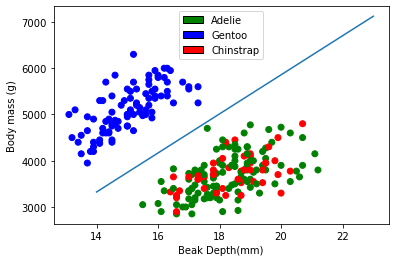

In [128]:
plt.scatter(X[:,0], X[:,1], color=penguinclean.Species.map(colors) )
plt.legend(handles=legend_elements)

plt.xlabel("Beak Depth(mm)"); plt.ylabel("Body mass (g)")
plt.plot(x0div, x1div)


### Trying multi mean 


#### Trying 

In [135]:
train

,Unnamed: 0,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex,SP1,SP2,SP3
0,198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,FEMALE,False,False,True
1,310,Gentoo,Biscoe,47.5,15.0,218.0,4950.0,FEMALE,False,True,False
2,223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE,False,True,False
3,135,Adelie,Dream,41.1,17.5,190.0,3900.0,MALE,True,False,False
4,290,Gentoo,Biscoe,47.7,15.0,216.0,4750.0,FEMALE,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
252,215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE,False,False,True
253,74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE,True,False,False
254,64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,FEMALE,True,False,False
255,46,Adelie,Dream,41.1,19.0,182.0,3425.0,MALE,True,False,False


In [187]:
####A

In [136]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
# Extract the X and Y variables
X = train[['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
Y = train['Species']

type(X), type(Y_encoded)
Y.values.reshape(-1,1).shape
# One-hot encode the species variable
encoder = OneHotEncoder(sparse=False)
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, Y_encoded)

# Print the coefficients
print(reg.coef_)
print(reg.intercept_)

[[-0.07159084  0.09640451 -0.00483602  0.0001338 ]
 [ 0.0726862   0.02682832 -0.00522831 -0.0003287 ]
 [-0.00109536 -0.12323283  0.01006433  0.0001949 ]]
[ 2.34473802 -1.01796373 -0.32677428]


c:\Users\charl\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


c:\Users\charl\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


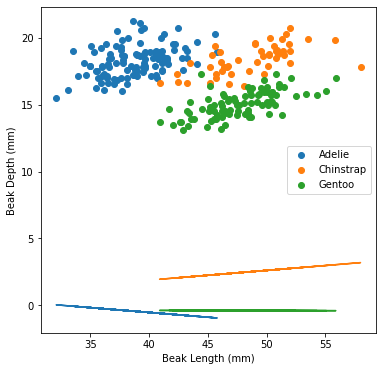

In [185]:
import matplotlib.pyplot as plt

# Extract the X and Y variables
X = train[['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
Y = train['Species']

# One-hot encode the species variable
encoder = OneHotEncoder(sparse=False)
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, Y_encoded)

# Get the species labels
species_labels = encoder.categories_[0]

# Create a scatter plot
plt.figure(figsize=(6, 6))
for i, label in enumerate(species_labels):
    x = train.loc[train['Species'] == label, 'Beak Length (mm)']
    y = train.loc[train['Species'] == label, 'Beak Depth (mm)']
    plt.scatter(x, y, label=label)
    plt.plot(x, reg.coef_[i, 0]*x + reg.intercept_[i], '-')

plt.xlabel('Beak Length (mm)')
plt.ylabel('Beak Depth (mm)')
plt.legend()
plt.show()


In [137]:
###plotting

In [188]:
####B

In [204]:
from sklearn.linear_model import LogisticRegression

# Extract the X and Y variables
X = train[['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
Y = train['Species']

# One-hot encode the species variable
encoder = OneHotEncoder(sparse=False)
Y_encoded = encoder.fit_transform(Y.values.reshape(-1, 1))

# Create an instance of the LogisticRegression class
reg = LogisticRegression()

# Fit the model to the data
reg.fit(X, Y)

# Print the coefficients
print(reg.coef_)
print(reg.intercept_)





[[-9.37346611e-01  1.13873900e+00  1.00165910e-01  9.33888359e-04]
 [ 1.43939308e+00  3.47587618e-02 -1.81679430e-01 -7.00441387e-03]
 [-5.02046472e-01 -1.17349777e+00  8.15135200e-02  6.07052551e-03]]
[ 0.0266798  -0.00694476 -0.01973505]


c:\Users\charl\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: operands could not be broadcast together with shapes (50,) (2,) 

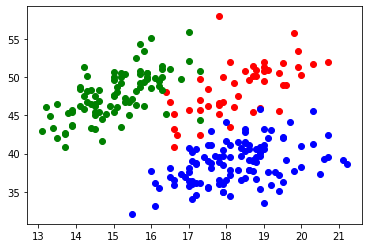

In [211]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Extract the X and Y variables
X = train[['Beak Length (mm)', 'Beak Depth (mm)']]
Y = train['Species']

# Create an instance of the LogisticRegression class
reg = LogisticRegression()

# Fit the model to the data
reg.fit(X, Y)

# Print the coefficients
coef = reg.coef_[0]
intercept = reg.intercept_

# Create a scatter plot for each species
species = train['Species'].unique()
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()
for i in range(len(species)):
    species_df = train[train['Species'] == species[i]]
    ax.scatter(species_df['Beak Depth (mm)'], species_df['Beak Length (mm)'], color=colors[i], label=species[i])

# Add the line of best fit to the plot
x = np.linspace(train['Beak Depth (mm)'].min(), train['Beak Depth (mm)'].max())
y = (x*coef) + intercept



ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Chinstrap'

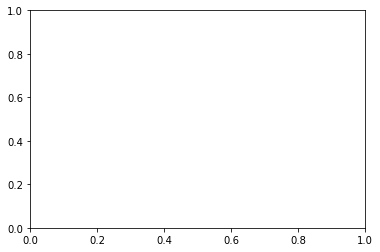

In [212]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Extract the X and Y variables
X = train[['Beak Length (mm)', 'Beak Depth (mm)']]
Y = train['Species']

# Create a scatter plot for each species
species = train['Species'].unique()
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()
for i in range(len(species)):
    species_df = train[train['Species'] == species[i]]
    X_species = species_df[['Beak Length (mm)', 'Beak Depth (mm)']]
    Y_species = species_df['Species']
    
    # Create an instance of the LogisticRegression class
    reg = LogisticRegression()

    # Fit the model to the data
    reg.fit(X_species, Y_species)

    # Print the coefficients
    coef = reg.coef_[0]
    intercept = reg.intercept_

    ax.scatter(species_df['Beak Depth (mm)'], species_df['Beak Length (mm)'], color=colors[i], label=species[i])
    
    x = np.linspace(species_df['Beak Depth (mm)'].min(), species_df['Beak Depth (mm)'].max())
    y = x*coef[1] + coef[0]*x + intercept
    ax.plot(x, y, color='black', label='Logistic Regression')

# Add labels and show the plot  
    ax.set_xlabel('Beak Depth (mm)')
    ax.set_ylabel('Beak Length (mm)')
    ax.legend()
    plt.show()